# Project 2: Heart Disease Analysis

## 1. Load Libraries and Data

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import graphviz
import os

# Create directories for outputs if they don't exist
os.makedirs('../output/trees', exist_ok=True)
os.makedirs('../output/plots', exist_ok=True)
# Define column names based on heart-disease.names
column_names = [
    'age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 
    'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'
]

# Load the dataset
file_path = '../data/processed.cleveland.data'
df = pd.read_csv(file_path, header=None, names=column_names, na_values='?')

# Display first 5 rows and info
print("Original Data Head:")
display(df.head())

print("\nData Info:")
df.info()

Original Data Head:


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0



Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    float64
 1   sex       303 non-null    float64
 2   cp        303 non-null    float64
 3   trestbps  303 non-null    float64
 4   chol      303 non-null    float64
 5   fbs       303 non-null    float64
 6   restecg   303 non-null    float64
 7   thalach   303 non-null    float64
 8   exang     303 non-null    float64
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    float64
 11  ca        299 non-null    float64
 12  thal      301 non-null    float64
 13  target    303 non-null    int64  
dtypes: float64(13), int64(1)
memory usage: 33.3 KB


### Data Cleaning and Preprocessing

1.  **Handle Missing Values**: The dataset contains a few missing values marked as `?`. We will drop rows with any missing values as they are a small fraction of the total data.
2.  **Target Variable Transformation**: The `target` column indicates the presence of heart disease, with 0 for no disease and 1, 2, 3, 4 for varying degrees of disease. As per the project specification, we will convert this into a binary classification problem: 0 for 'No Disease' and 1 for 'Disease'.

In [12]:
# Drop rows with missing values
df_clean = df.dropna()

# Transform target variable: 0 = No Disease, >0 = Disease
df_clean['target'] = (df_clean['target'] > 0).astype(int)

# Separate features (X) and target (y)
X = df_clean.drop('target', axis=1)
y = df_clean['target']

print(f"Shape of data after cleaning: {df_clean.shape}")
print("\nTarget variable distribution after transformation:")
print(y.value_counts())

Shape of data after cleaning: (297, 14)

Target variable distribution after transformation:
target
0    160
1    137
Name: count, dtype: int64


/tmp/ipykernel_1009757/3658955894.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['target'] = (df_clean['target'] > 0).astype(int)


## 2.1 Preparing the Datasets

We will create four training and testing subsets with different proportions (40/60, 60/40, 80/20, 90/10) using stratified splitting to maintain the class distribution.

In [13]:
splits = {
    '40/60': train_test_split(X, y, test_size=0.60, random_state=42, stratify=y),
    '60/40': train_test_split(X, y, test_size=0.40, random_state=42, stratify=y),
    '80/20': train_test_split(X, y, test_size=0.20, random_state=42, stratify=y),
    '90/10': train_test_split(X, y, test_size=0.10, random_state=42, stratify=y)
}

print("Created the following splits (train/test):")
for name, data in splits.items():
    print(f"- {name}: Train shape={data[0].shape}, Test shape={data[1].shape}")

Created the following splits (train/test):
- 40/60: Train shape=(118, 13), Test shape=(179, 13)
- 60/40: Train shape=(178, 13), Test shape=(119, 13)
- 80/20: Train shape=(237, 13), Test shape=(60, 13)
- 90/10: Train shape=(267, 13), Test shape=(30, 13)


### Visualize Class Distributions

Let's visualize the class distributions across the original dataset and all splits to confirm that stratification worked correctly.

/tmp/ipykernel_1009757/4053327635.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0, 0].set_xticklabels(['No Disease', 'Disease'])
/tmp/ipykernel_1009757/4053327635.py:19: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[row, 0].set_xticklabels(['No Disease', 'Disease'])
/tmp/ipykernel_1009757/4053327635.py:24: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[row, 1].set_xticklabels(['No Disease', 'Disease'])
/tmp/ipykernel_1009757/4053327635.py:19: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[row, 0].set_xticklabels(['No Disease', 'Disease'])
/tmp/ipykernel_1009757/4053327635.py:24: UserWarning: set_ticklabels() should only be used with

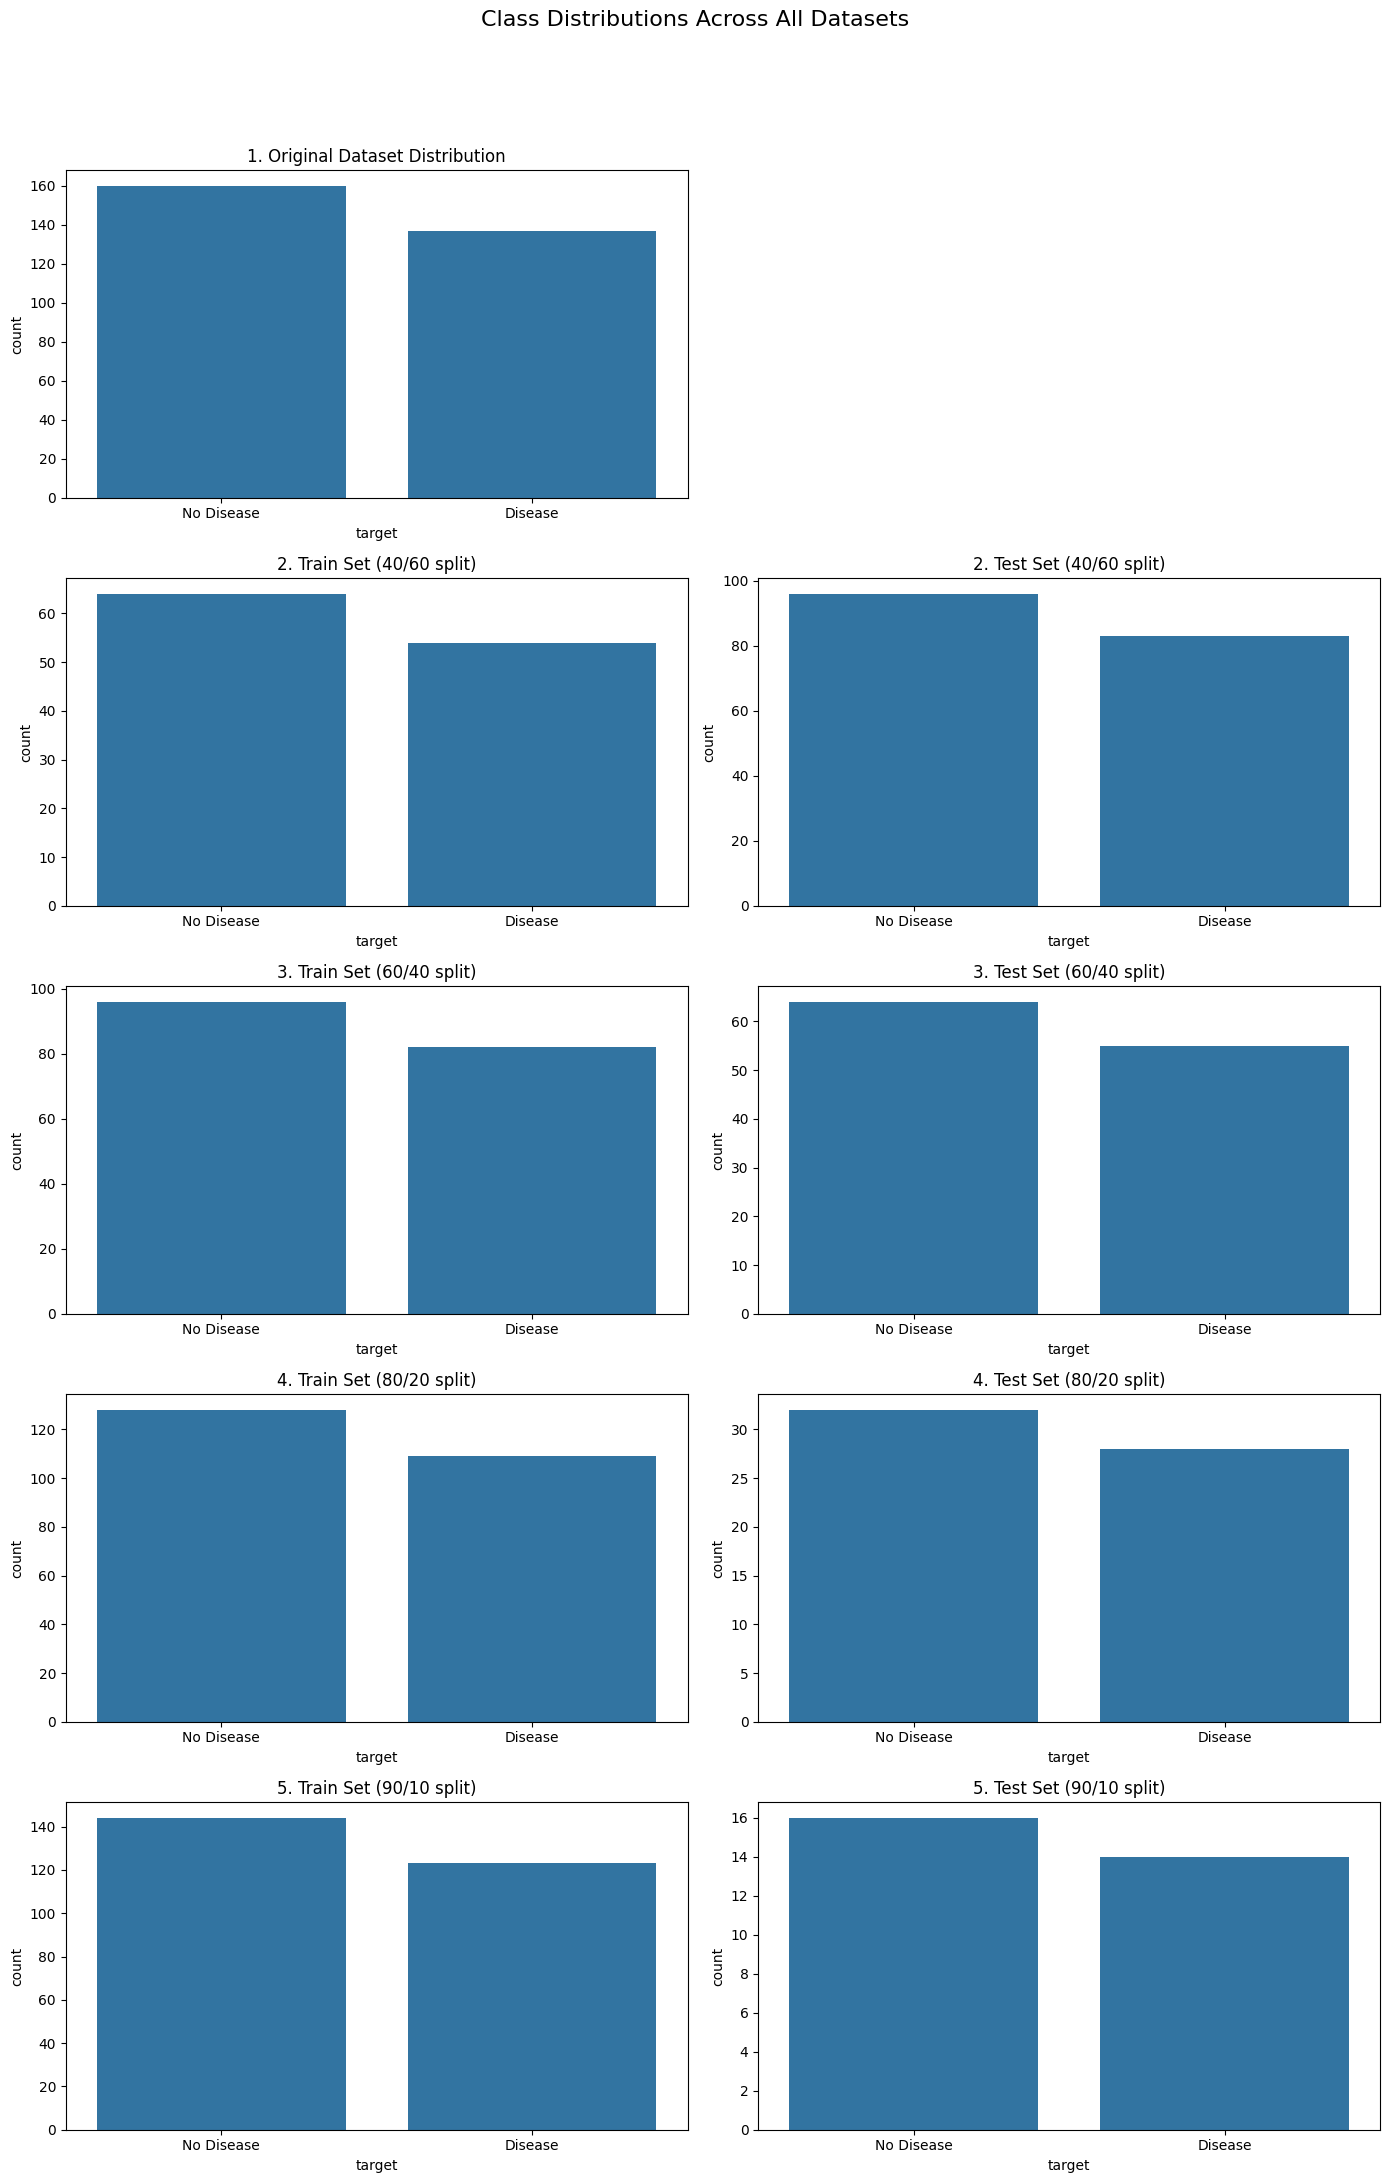

In [ ]:
# Create a figure to hold all distribution plots
fig, axes = plt.subplots(5, 2, figsize=(14, 22))
fig.suptitle('Class Distributions Across All Datasets', fontsize=16, y=1.02)

# 1. Original Dataset
sns.countplot(x=y, ax=axes[0, 0])
axes[0, 0].set_title('1. Original Dataset Distribution')
axes[0, 0].set_xticklabels(['No Disease', 'Disease'])
axes[0, 1].axis('off') # Hide the unused subplot in the first row

# 2. Distributions for each split
for i, (name, data) in enumerate(splits.items()):
    X_train, X_test, y_train, y_test = data
    row = i + 1

    # Plot Training Set Distribution
    sns.countplot(x=y_train, ax=axes[row, 0])
    axes[row, 0].set_title(f'{i+2}. Train Set ({name} split)')
    axes[row, 0].set_xticklabels(['No Disease', 'Disease'])

    # Plot Test Set Distribution
    sns.countplot(x=y_test, ax=axes[row, 1])
    axes[row, 1].set_title(f'{i+2}. Test Set ({name} split)')
    axes[row, 1].set_xticklabels(['No Disease', 'Disease'])

plt.tight_layout(rect=[0, 0.03, 1, 0.98]) # Adjust layout to make space for suptitle
plt.savefig('../output/plots/class_distributions.png', bbox_inches='tight')
plt.show()

## 2.2 & 2.3 Building and Evaluating Decision Tree Classifiers

For each split, we will:
1.  Fit a `DecisionTreeClassifier` using information gain (`criterion='entropy'`).
2.  Visualize the resulting tree.
3.  Predict on the test set and generate a `classification_report` and a `confusion_matrix`.


Processing Split: 40/60

Decision Tree for 40/60 split:


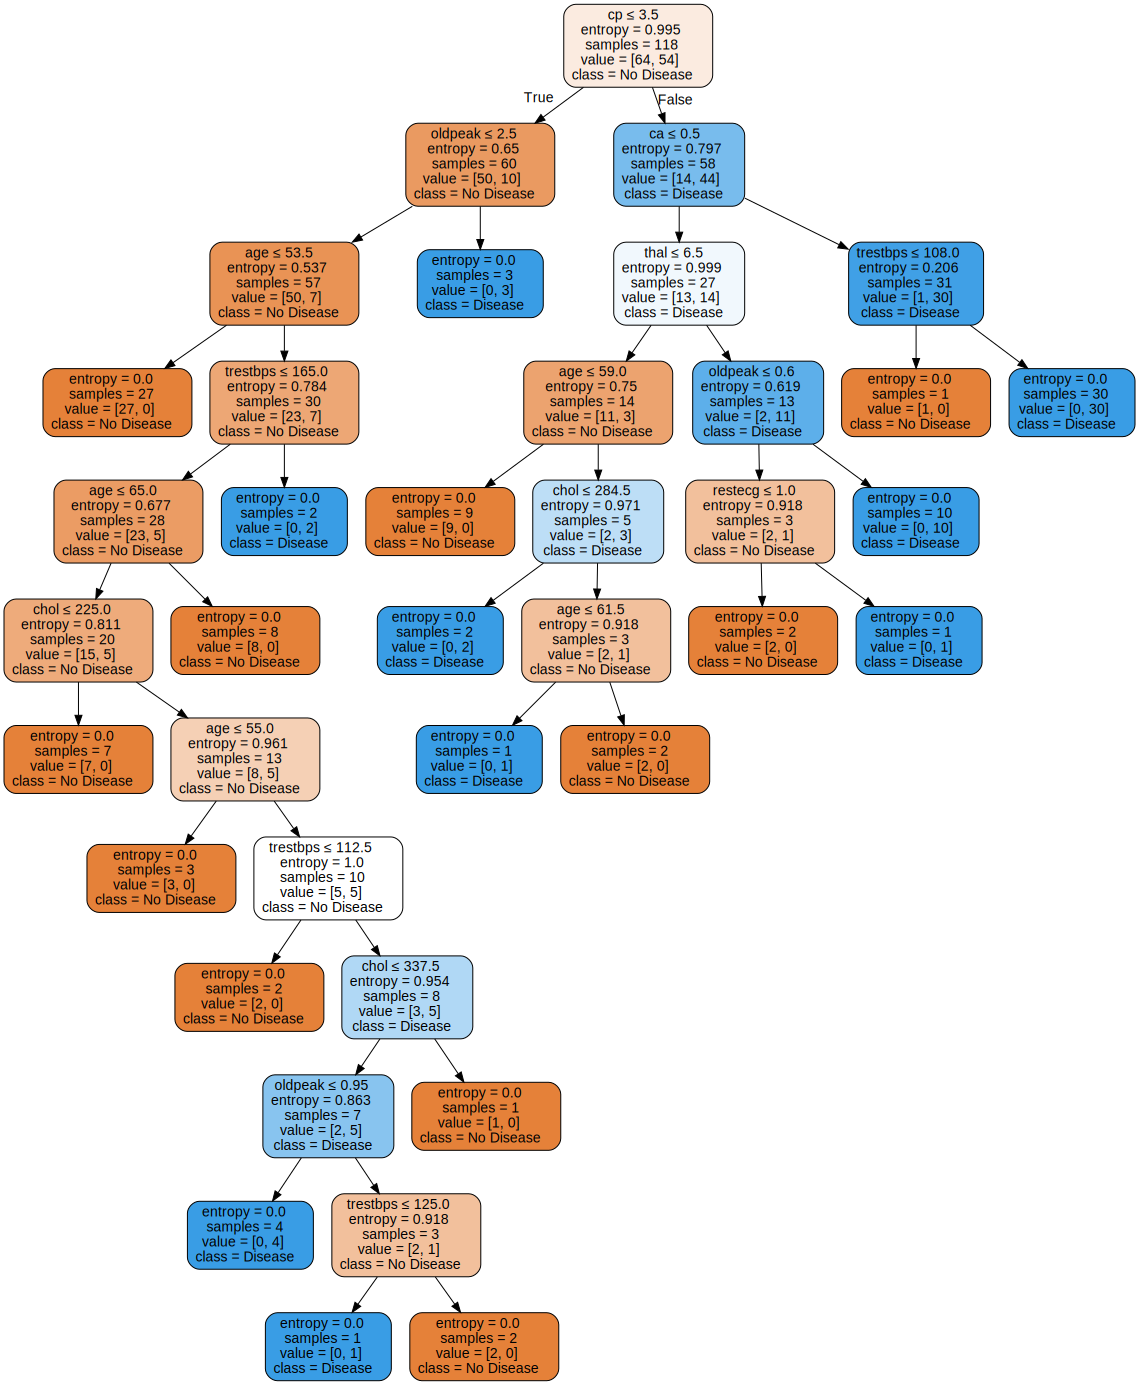


Classification Report for 40/60 split:
              precision    recall  f1-score   support

  No Disease       0.77      0.82      0.80        96
     Disease       0.78      0.72      0.75        83

    accuracy                           0.78       179
   macro avg       0.78      0.77      0.77       179
weighted avg       0.78      0.78      0.78       179



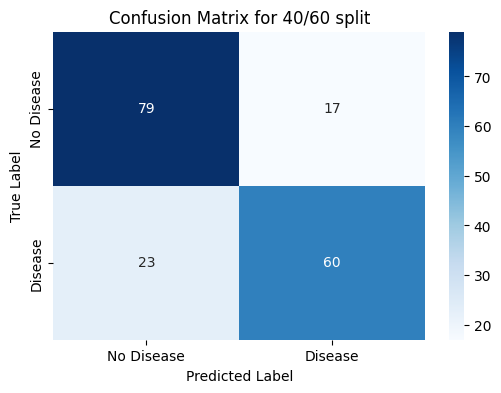


Processing Split: 60/40

Decision Tree for 60/40 split:


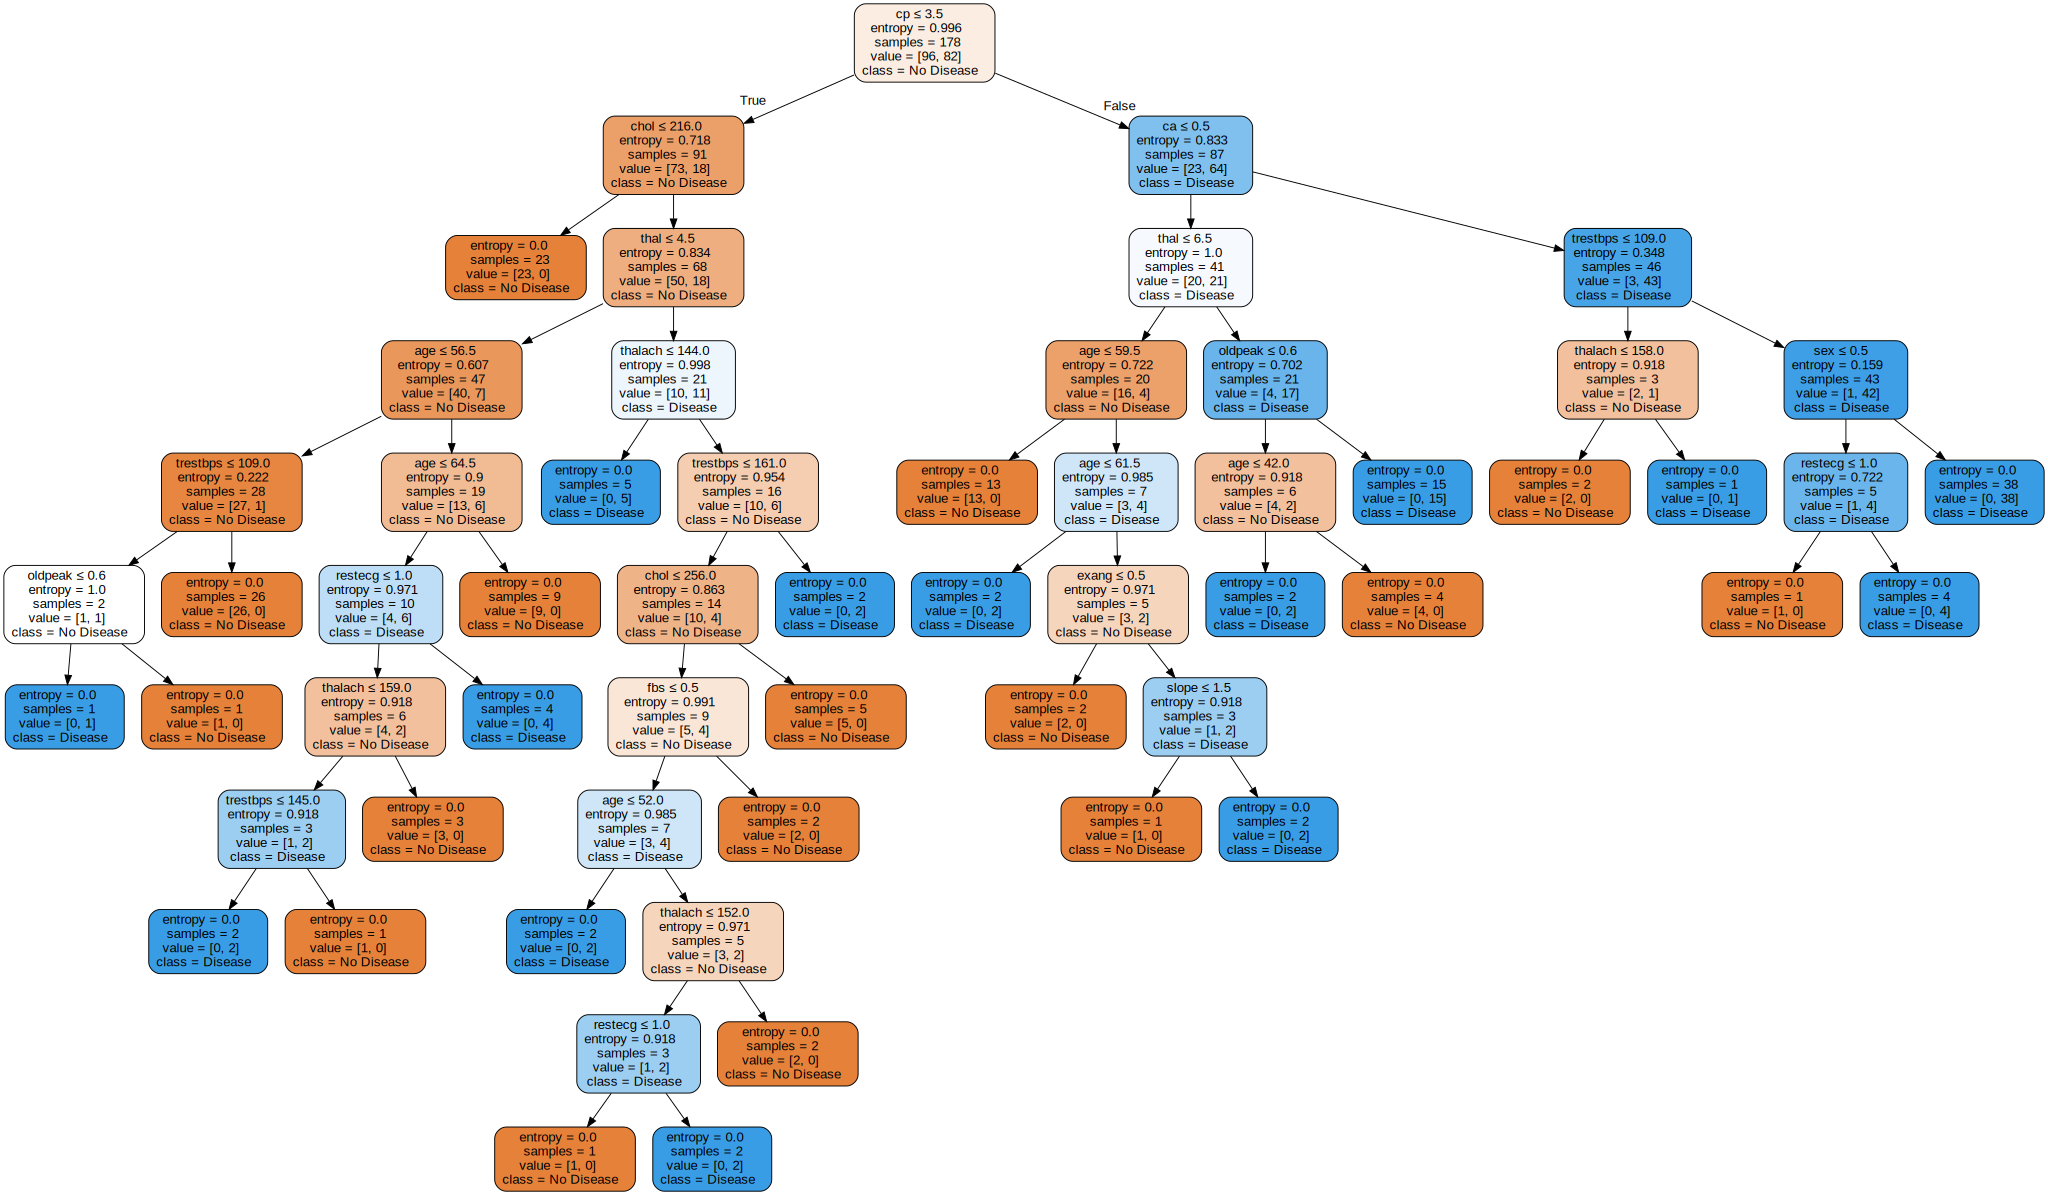


Classification Report for 60/40 split:
              precision    recall  f1-score   support

  No Disease       0.72      0.86      0.79        64
     Disease       0.79      0.62      0.69        55

    accuracy                           0.75       119
   macro avg       0.76      0.74      0.74       119
weighted avg       0.75      0.75      0.74       119



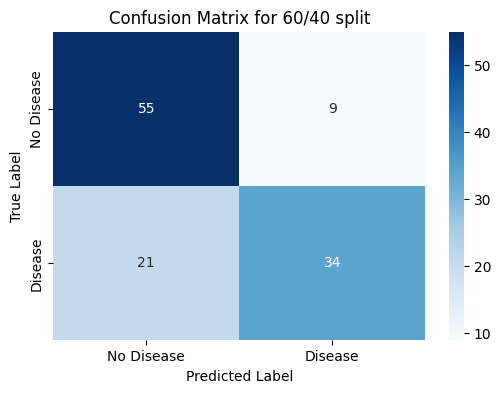


Processing Split: 80/20

Decision Tree for 80/20 split:


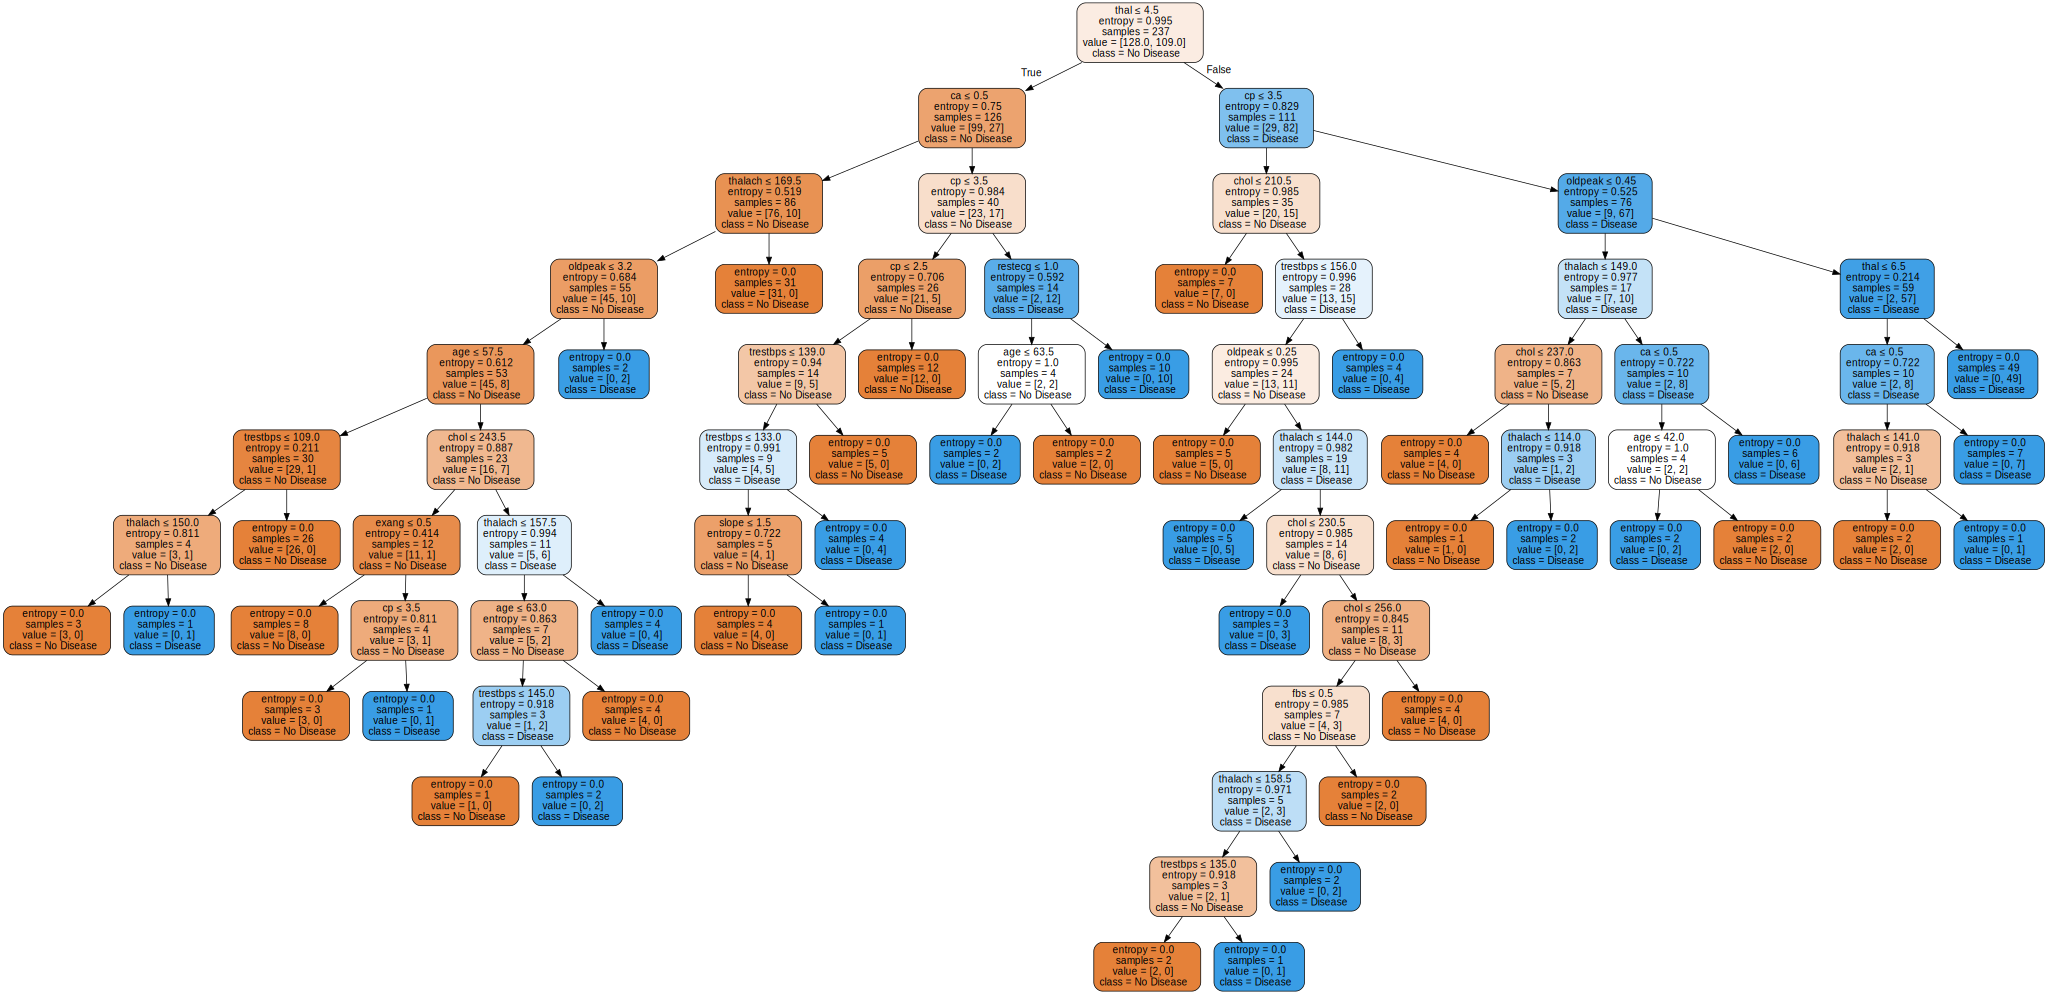


Classification Report for 80/20 split:
              precision    recall  f1-score   support

  No Disease       0.80      0.75      0.77        32
     Disease       0.73      0.79      0.76        28

    accuracy                           0.77        60
   macro avg       0.77      0.77      0.77        60
weighted avg       0.77      0.77      0.77        60



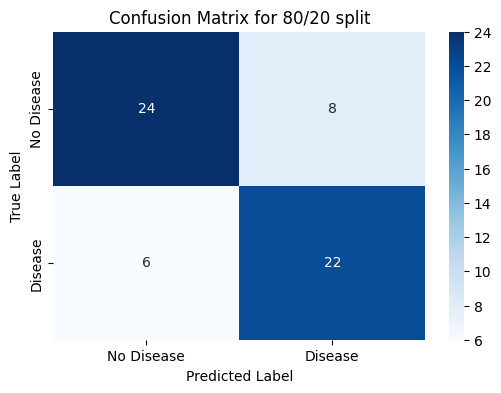


Processing Split: 90/10

Decision Tree for 90/10 split:


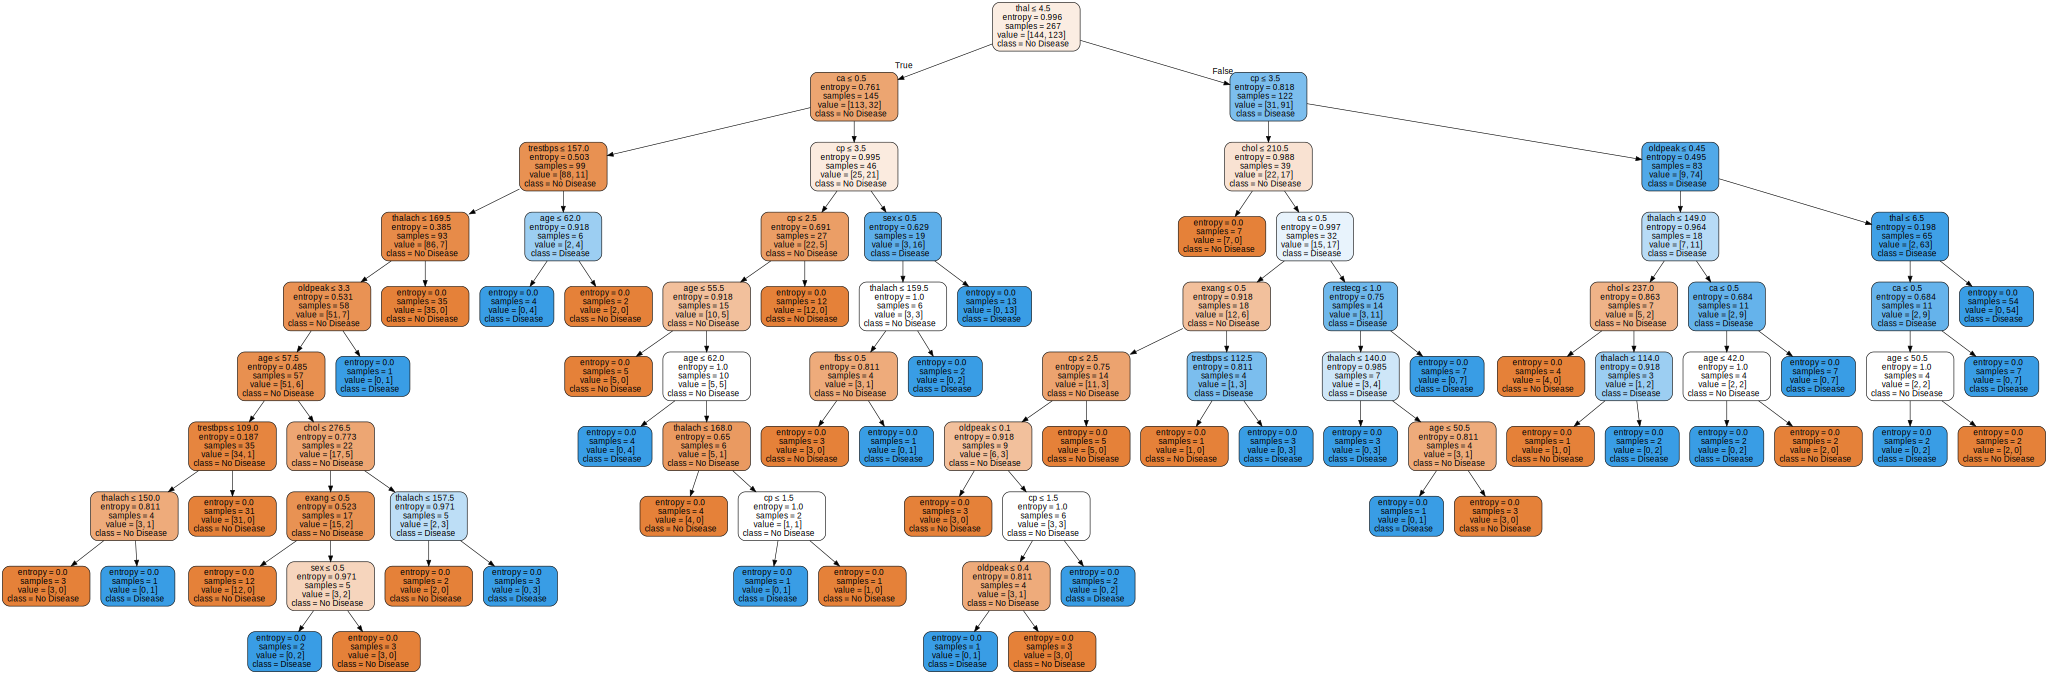


Classification Report for 90/10 split:
              precision    recall  f1-score   support

  No Disease       0.68      0.81      0.74        16
     Disease       0.73      0.57      0.64        14

    accuracy                           0.70        30
   macro avg       0.71      0.69      0.69        30
weighted avg       0.70      0.70      0.69        30



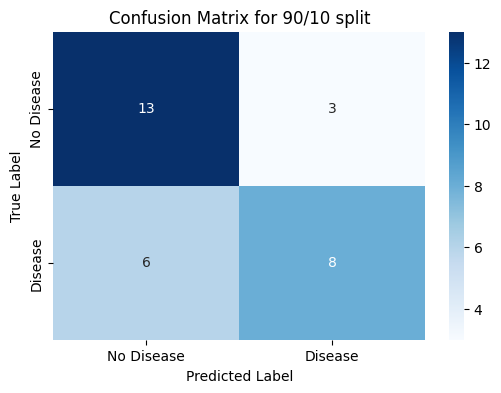

In [8]:
feature_names = X.columns
class_names = ['No Disease', 'Disease']

for name, data in splits.items():
    X_train, X_test, y_train, y_test = data
    
    print(f"\n{'='*50}")
    print(f"Processing Split: {name}")
    print(f"{'='*50}")

    # 1. Fit the classifier
    dt_classifier = DecisionTreeClassifier(criterion='entropy', random_state=42)
    dt_classifier.fit(X_train, y_train)

    # 2. Visualize the tree
    dot_data = export_graphviz(dt_classifier, out_file=None, 
                               feature_names=feature_names,
                               class_names=class_names,
                               filled=True, rounded=True,  
                               special_characters=True)
    
    graph_title = f'Decision Tree for {name.replace("/", "-")} Split'
    graph = graphviz.Source(dot_data)
    graph.render(f"../output/trees/{graph_title}", format='png', cleanup=True)
    print(f"\nDecision Tree for {name} split:")
    display(graph)

    # 3. Evaluate the classifier
    y_pred = dt_classifier.predict(X_test)

    print(f"\nClassification Report for {name} split:")
    print(classification_report(y_test, y_pred, target_names=class_names))

    # Plot confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
    plt.title(f'Confusion Matrix for {name} split')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()

### Insights on Classifier Performance (Task 2.3)

Based on the reports and matrices above:

*   **Confusion Matrix**: This matrix shows the number of correct and incorrect predictions. The diagonal elements (top-left to bottom-right) represent correct predictions (True Negatives and True Positives), while off-diagonal elements are errors (False Positives and False Negatives).
*   **Classification Report**:
    *   **Precision**: Measures the accuracy of positive predictions (`TP / (TP + FP)`). High precision for the 'Disease' class means that when the model predicts a patient has the disease, it is likely correct.
    *   **Recall (Sensitivity)**: Measures the model's ability to find all positive samples (`TP / (TP + FN)`). High recall for the 'Disease' class means the model is good at identifying patients who actually have the disease.
    *   **F1-score**: The harmonic mean of precision and recall. It's a good overall measure, especially if the class distribution is uneven.
    *   **Accuracy**: The overall proportion of correct predictions.

**General Observation**: As the training set size increases (from 40% to 90%), the model's performance on the test set generally improves, showing higher accuracy, precision, and recall. This is expected, as more data allows the model to learn the underlying patterns more effectively. The 80/20 and 90/10 splits tend to yield the best and most stable results.

## 2.4 The Depth and Accuracy of a Decision Tree

This task focuses on the 80/20 split. We will analyze how the `max_depth` parameter affects classification accuracy by trying values: `None, 2, 3, 4, 5, 6, 7`.

--- Visualizing Decision Trees for each max_depth ---

Tree for max_depth = None


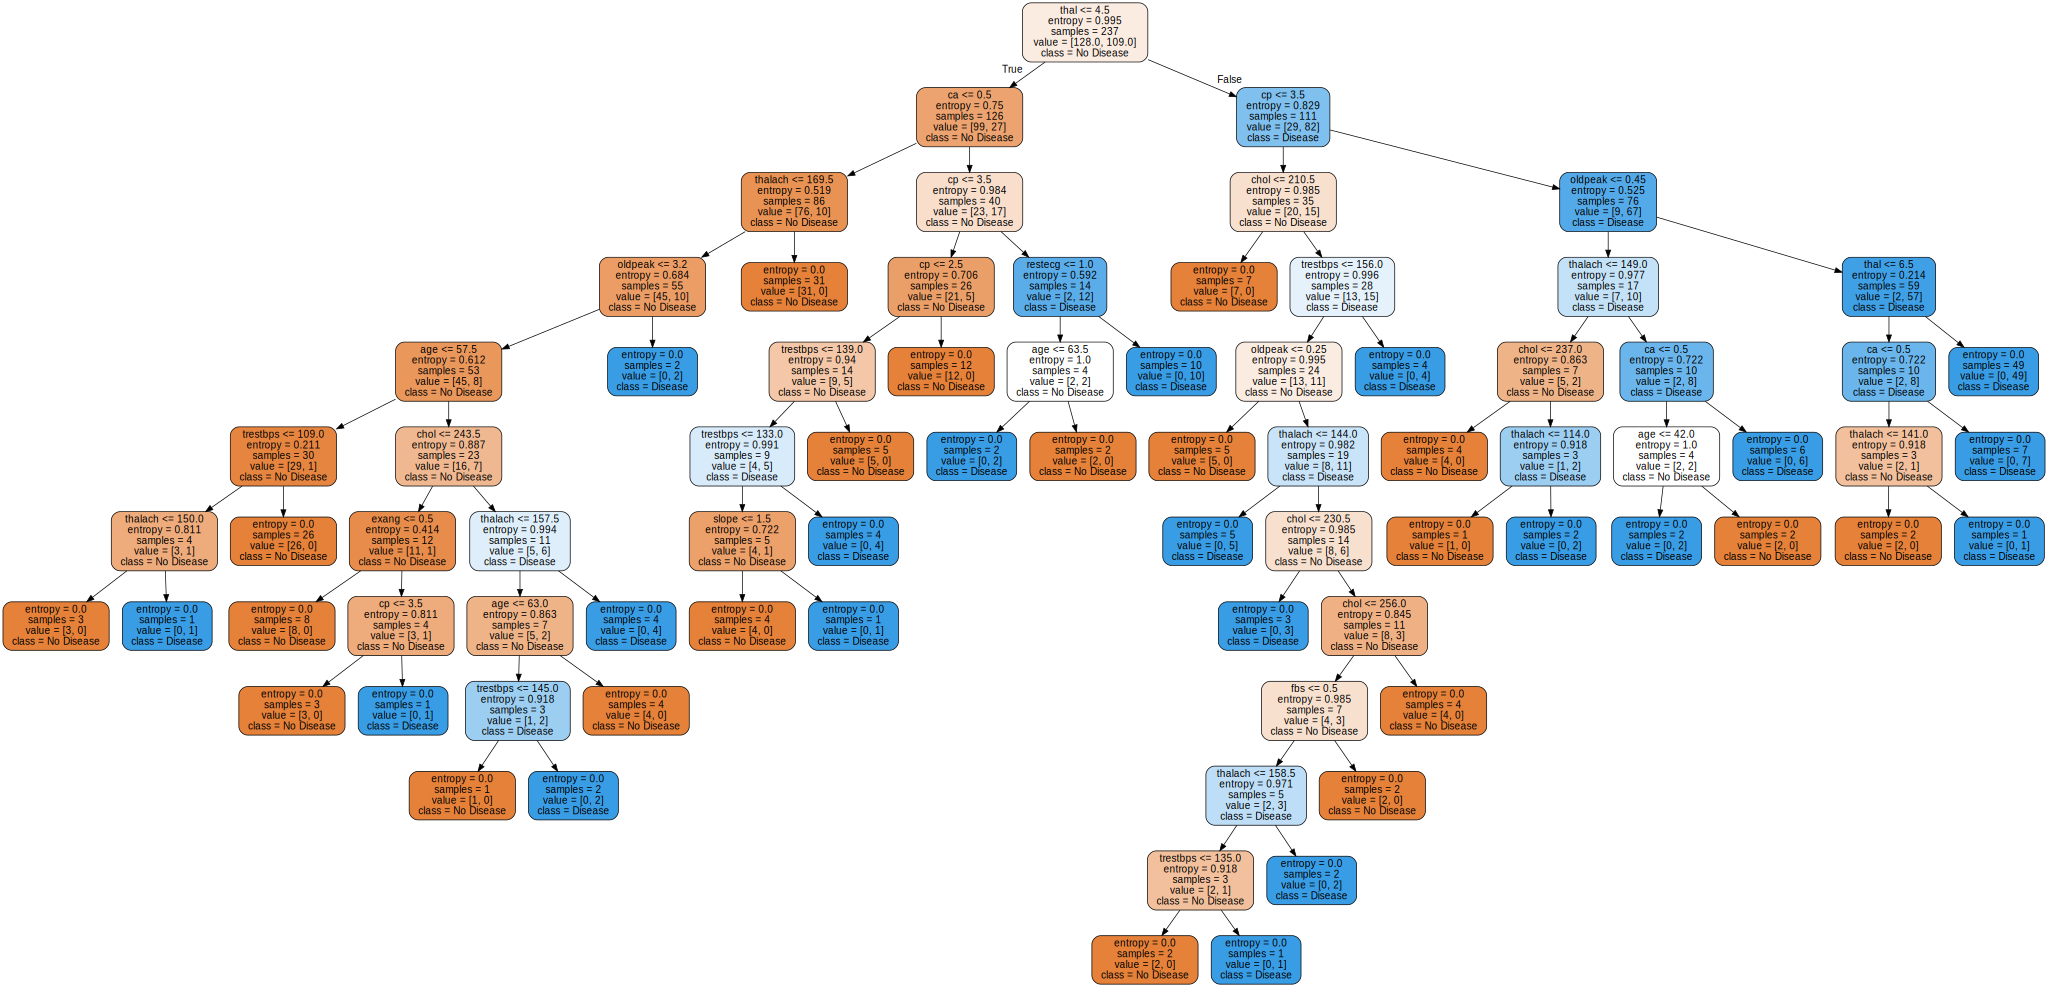


Tree for max_depth = 2


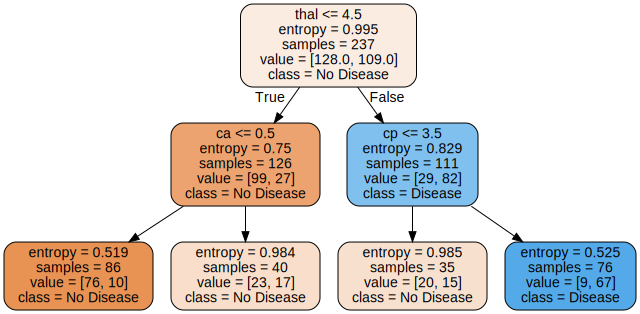


Tree for max_depth = 3


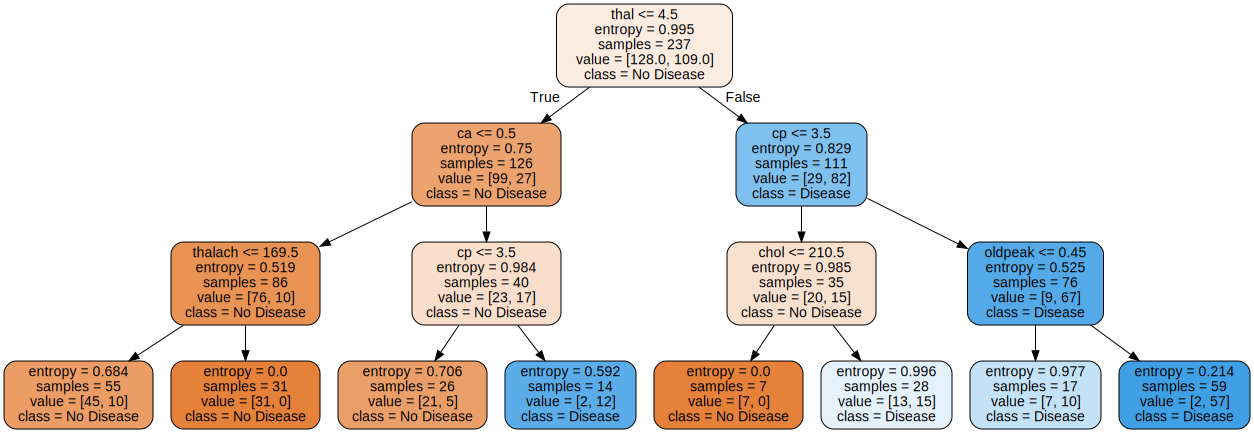


Tree for max_depth = 4


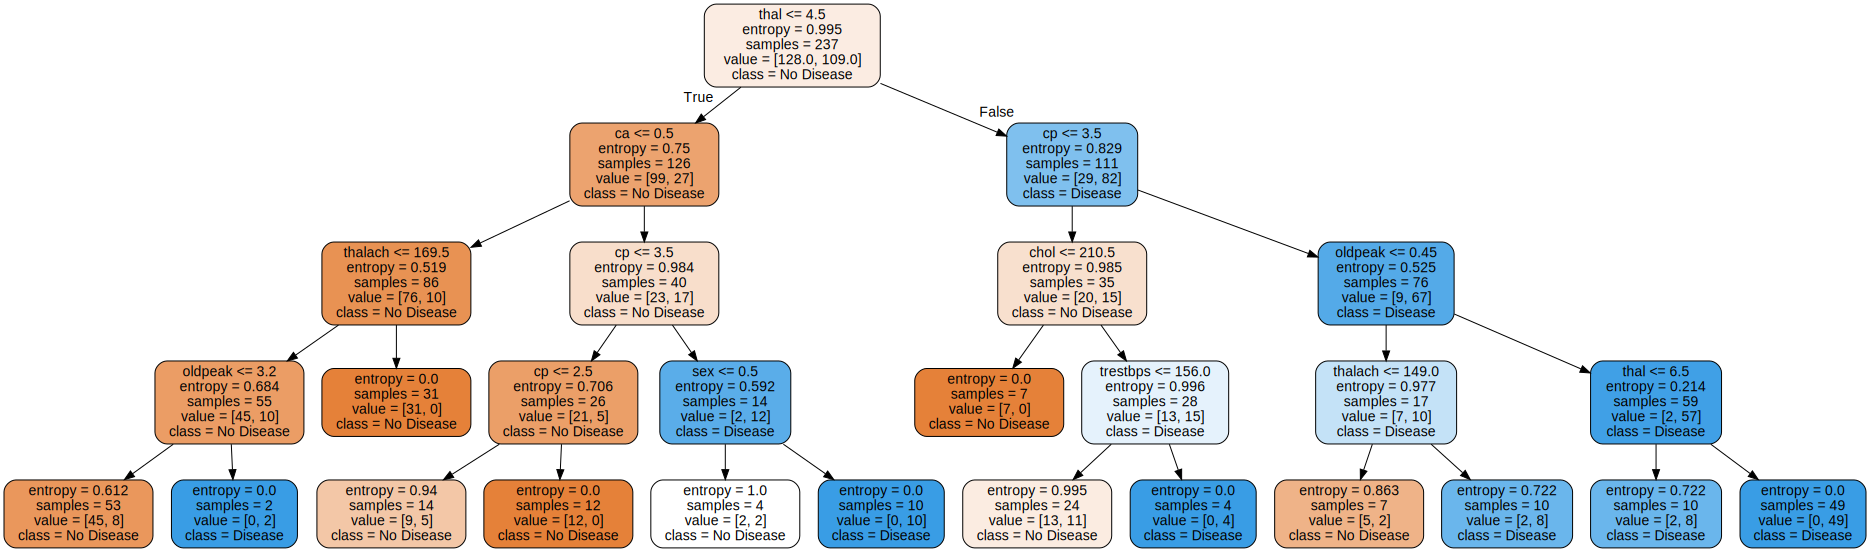


Tree for max_depth = 5


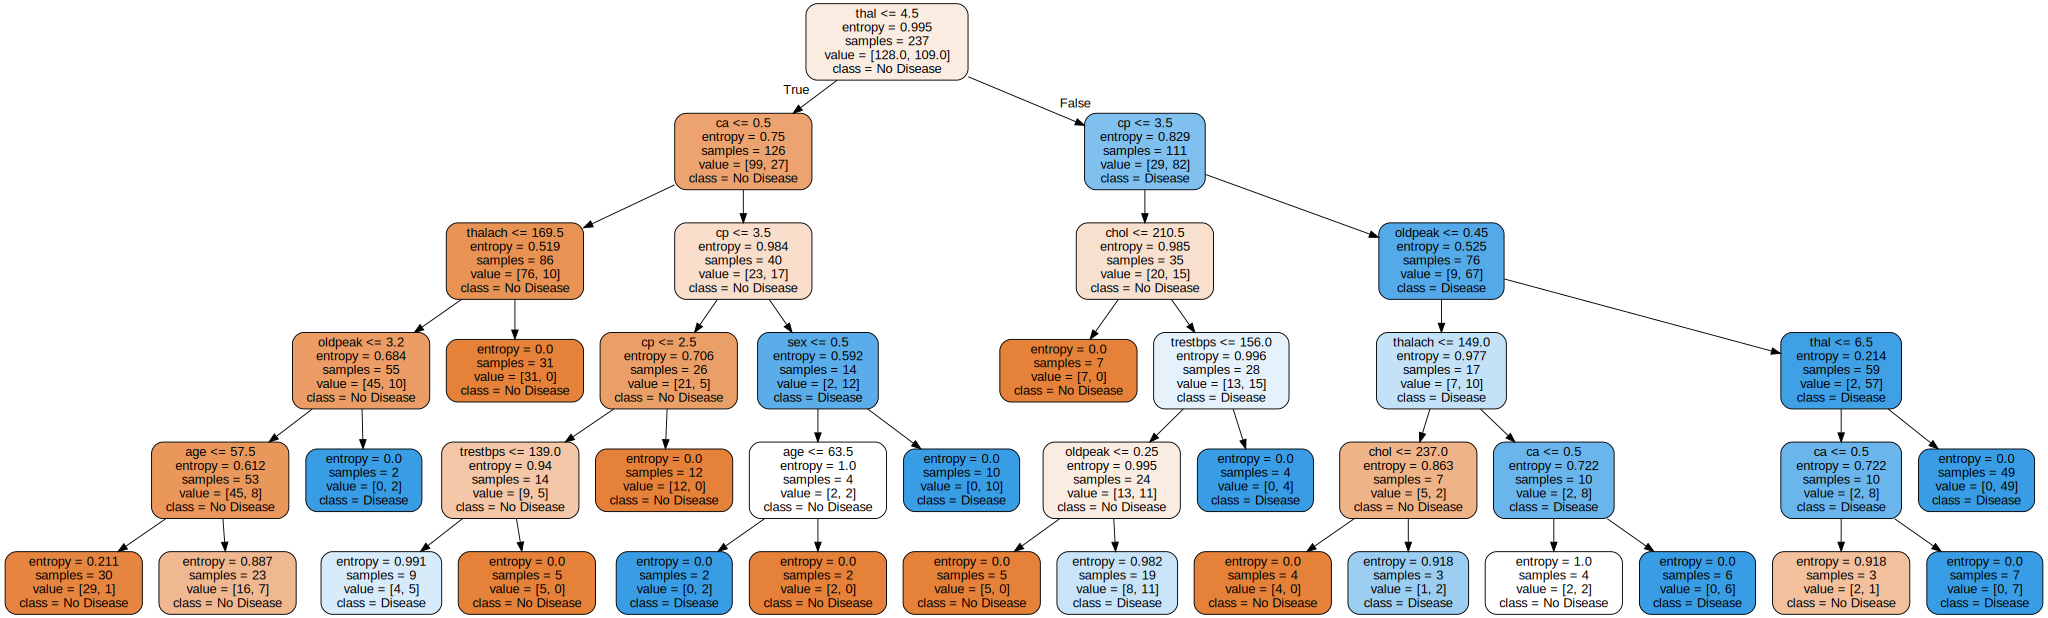


Tree for max_depth = 6


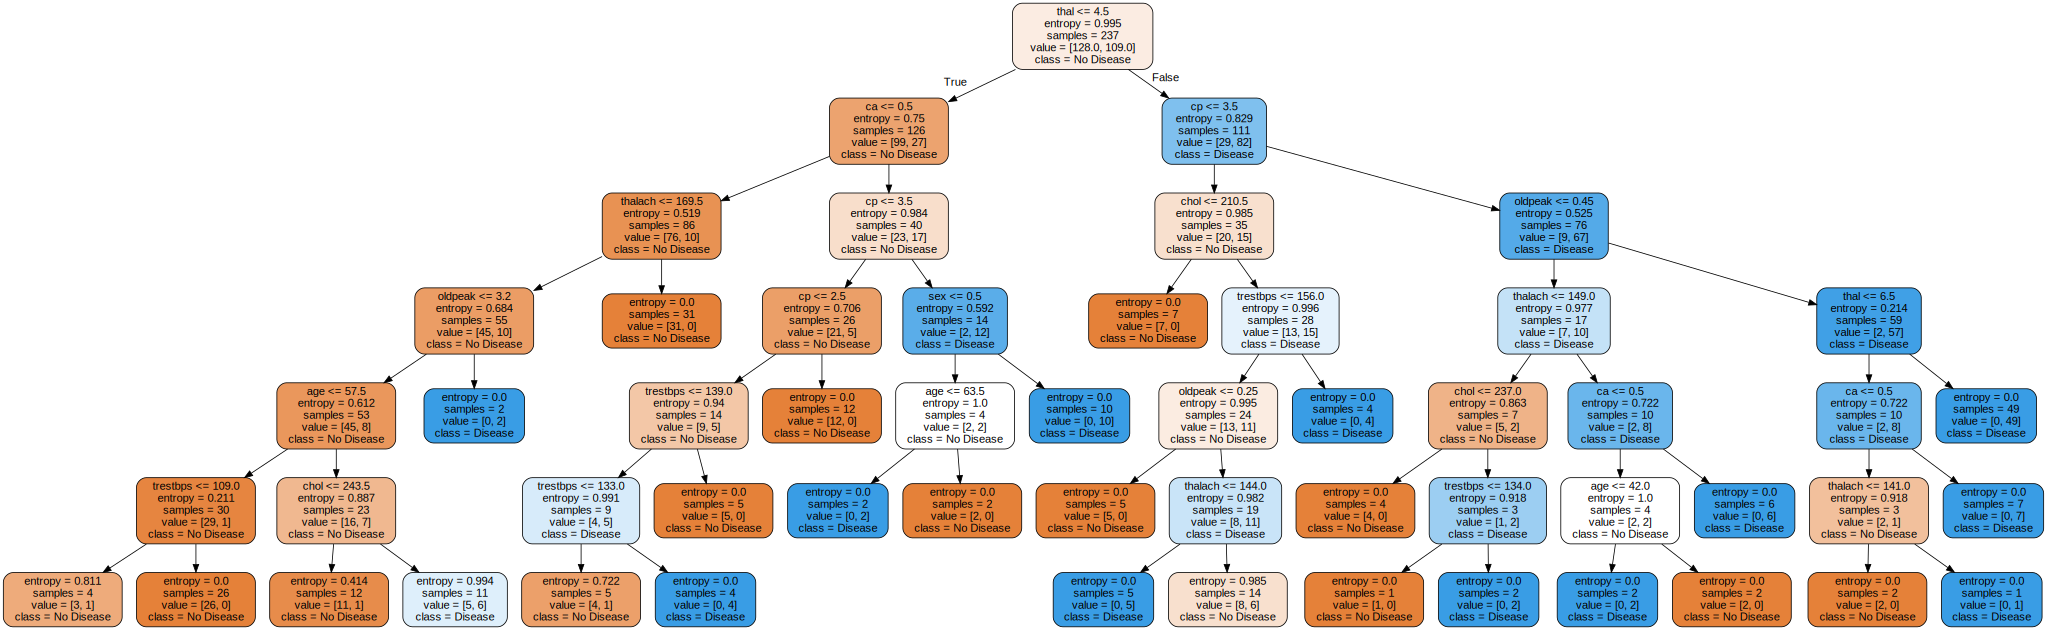


Tree for max_depth = 7


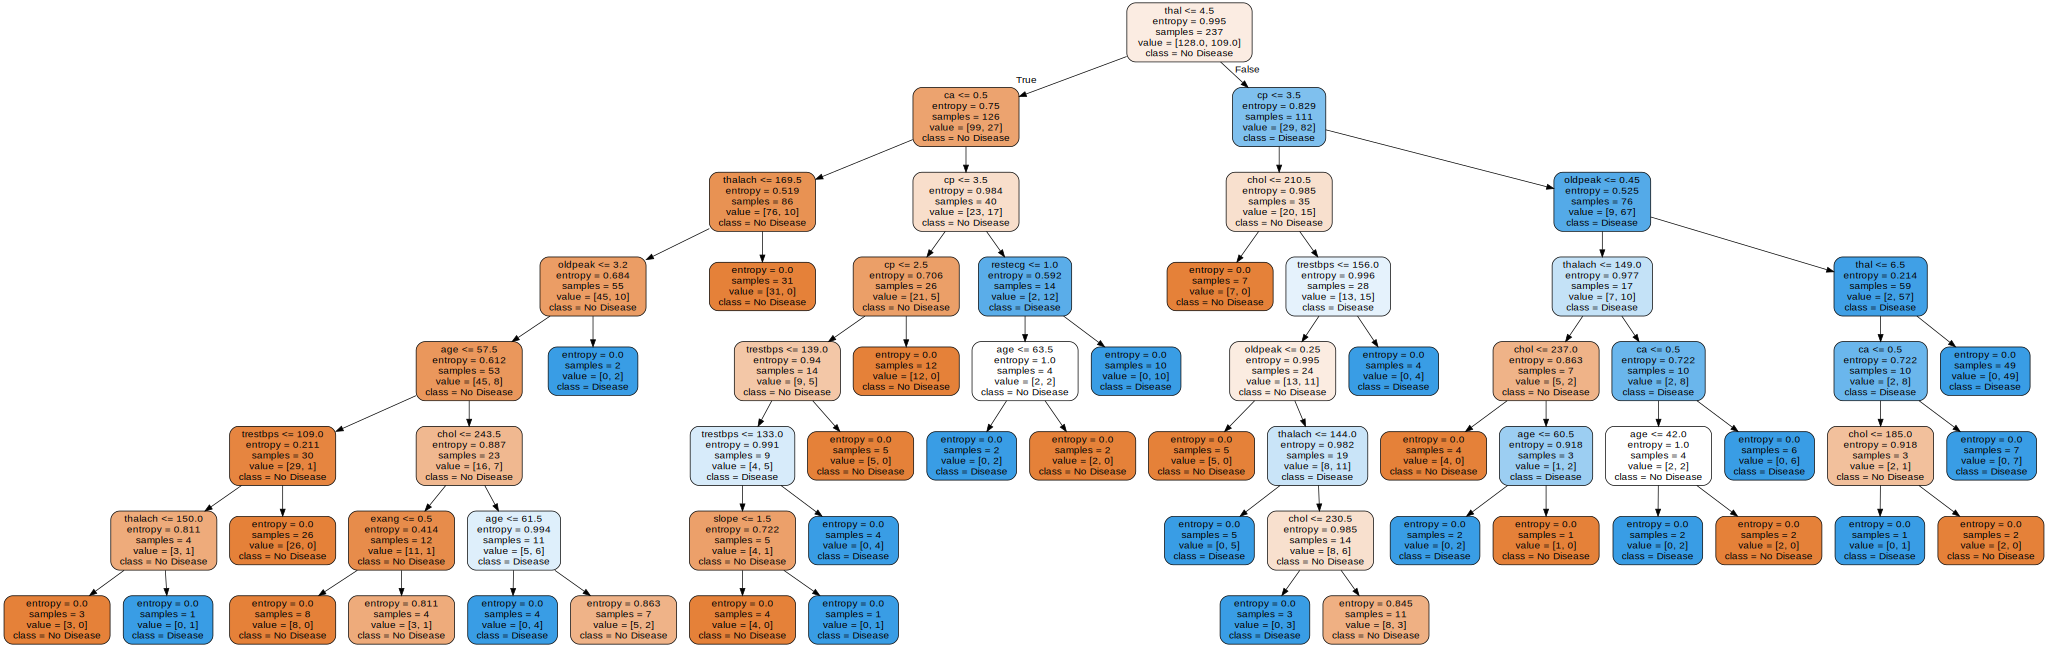

In [9]:
X_train_80, X_test_80, y_train_80, y_test_80 = splits['80/20']

depths = [None, 2, 3, 4, 5, 6, 7]
accuracies = []
train_accuracies = []

print("--- Visualizing Decision Trees for each max_depth ---")

for depth in depths:
    # Create and fit the model
    dt_depth = DecisionTreeClassifier(criterion='entropy', max_depth=depth, random_state=42)
    dt_depth.fit(X_train_80, y_train_80)
    
    # Make predictions and calculate accuracy
    y_pred_depth = dt_depth.predict(X_test_80)
    accuracy = accuracy_score(y_test_80, y_pred_depth)
    accuracies.append(accuracy)
    
    # Calculate training accuracy for overfitting analysis
    train_accuracy = accuracy_score(y_train_80, dt_depth.predict(X_train_80))
    train_accuracies.append(train_accuracy)
    
    # Visualize the tree
    depth_str = 'None' if depth is None else str(depth)
    print(f"\nTree for max_depth = {depth_str}")
    dot_data = export_graphviz(dt_depth, out_file=None, 
                               feature_names=feature_names,
                               class_names=class_names,
                               filled=True, rounded=True)
    graph = graphviz.Source(dot_data)
    display(graph)

### Accuracy Score Report

In [ ]:
depth_labels = ['None' if d is None else str(d) for d in depths]
accuracy_table = pd.DataFrame({
    'max_depth': depth_labels,
    'Accuracy': accuracies
})

display(accuracy_table.set_index('max_depth').T)

### Charts and Insights on Statistics

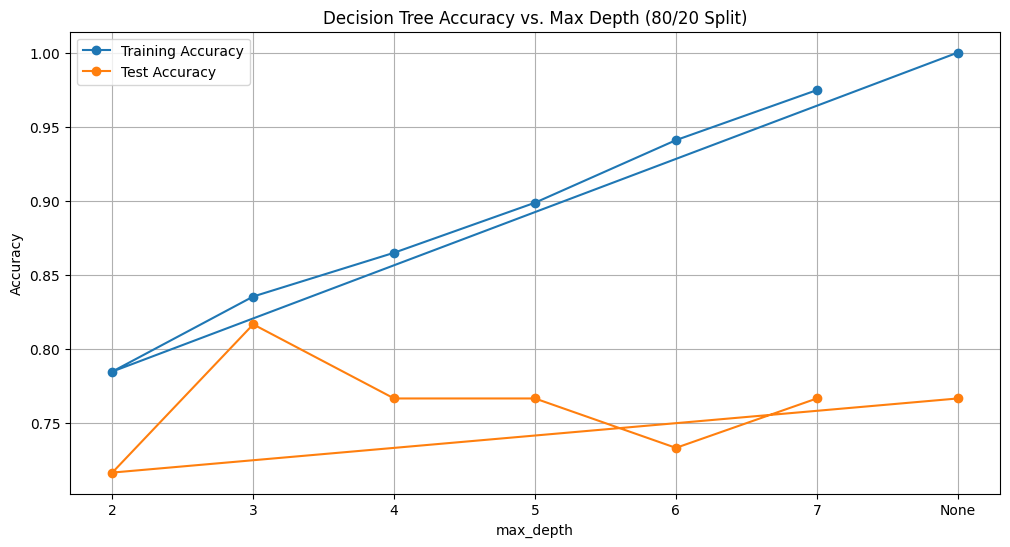

In [10]:
# For plotting, we'll replace 'None' with a value slightly larger than the max depth, e.g., 8
plot_depths = [d if d is not None else 8 for d in depths]
plot_labels = [str(d) if d is not None else 'None' for d in depths]

plt.figure(figsize=(12, 6))

# Plot Test vs Train Accuracy
plt.plot(plot_depths, train_accuracies, 'o-', label='Training Accuracy')
plt.plot(plot_depths, accuracies, 'o-', label='Test Accuracy')

plt.title('Decision Tree Accuracy vs. Max Depth (80/20 Split)')
plt.xlabel('max_depth')
plt.ylabel('Accuracy')
plt.xticks(ticks=plot_depths, labels=plot_labels)
plt.grid(True)
plt.legend()
plt.show()

### Insights on Depth vs. Accuracy

1.  **Underfitting**: At a very low depth (e.g., `max_depth=2`), the model is too simple to capture the complexity of the data. Both training and test accuracy are relatively low. This is known as underfitting.

2.  **Optimal Depth**: As we increase the depth, the model becomes more complex and learns more patterns. Both training and test accuracy increase. The test accuracy peaks around `max_depth=3` or `max_depth=4`. This range represents a good balance between bias and variance, where the model generalizes well to unseen data.

3.  **Overfitting**: As the depth increases further (beyond 4) and especially when `max_depth=None` (the tree grows until all leaves are pure), the training accuracy continues to rise, reaching 100%. However, the test accuracy starts to stagnate or even decrease. The large gap between the training accuracy (blue line) and the test accuracy (orange line) is a clear sign of overfitting. The model has started to memorize the training data, including its noise, and loses its ability to generalize to the new test data.